# Predicting China Scholarship additional cost

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# We are going to read the csv file using read_csv() function
data = pd.read_csv('./data/cleaned.csv')

In [4]:
# Now let us see a preview of the data by looking at the first 5 rows 
data.head()

,schol_id,University,Major,Level,Language,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Month,Start_Year,Accomodation_To_Pay,Accomodation_duration,Expense_To_Pay,Expense_duration
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Non-Degree,English,7500.0,0,0,0,7500.0,Jun,2020,9750.0,MONTH,1000.0,MONTH
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
3,4,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
4,5,Qingdao University,Long-term Chinese Language Program,Non-Degree,Chinese,7000.0,1,1,0,7000.0,Sep,2019,0.0,YEAR,0.0,MONTH


In [5]:
# Let us also look at the last 5 rows of the dataframe
data.tail()

,schol_id,University,Major,Level,Language,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Month,Start_Year,Accomodation_To_Pay,Accomodation_duration,Expense_To_Pay,Expense_duration
3571,3601,East China University of Science and Technology,Environmental Science and Engineering,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3572,3602,East China University of Science and Technology,Power Engineering and Engineering Thermophysics,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3573,3603,East China University of Science and Technology,Thermal Engineering,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3574,3604,East China University of Science and Technology,Synthesis of Fine Chemical and Molecular,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3575,3605,East China University of Science and Technology,Sociology of Law,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH


In [6]:
# Let us see how many null values present in the columns 
data.isna().sum()

schol_id                     0
University                   0
Major                        0
Level                        0
Language                     0
Tuition Covered            123
Accomodation covered?        0
Living Expense Covered?      0
Tuition fees to pay          0
Original Tuition fee       123
Start_Month                  0
Start_Year                   0
Accomodation_To_Pay          0
Accomodation_duration        0
Expense_To_Pay               0
Expense_duration             0
dtype: int64

In [8]:
# Let us view the descriptive statistics of the dataframe. Note that this can only be applied to numerical values 
data[['Tuition Covered', 'Tuition fees to pay', 'Original Tuition fee', 'Accomodation_To_Pay', 'Expense_To_Pay']].describe().T

,count,mean,std,min,25%,50%,75%,max
Tuition Covered,3453.0,20531.704315,12428.124918,0.0,10625.0,20000.0,26500.0,80000.0
Tuition fees to pay,3576.0,8433.516499,9519.340675,0.0,0.0,6000.0,11000.0,69000.0
Original Tuition fee,3453.0,28693.955980,15341.450293,0.0,20000.0,26500.0,34000.0,148000.0
Accomodation_To_Pay,3576.0,1376.461969,2802.526970,0.0,400.0,900.0,1200.0,24000.0
Expense_To_Pay,3576.0,1070.987136,601.297528,0.0,1000.0,1000.0,1500.0,2700.0


In [9]:
# Let us define the predictor columns and the target column 
# X is the predictor
# y is the target variable
X = data.drop(['Tuition fees to pay'], axis = 1)
y = data['Tuition fees to pay']

In [11]:
# Here we are differentiating between the columns that are objects and the ones that are not
obj_cols = list(X.select_dtypes(include = 'object').columns)
num_cols = list(X.select_dtypes(exclude = 'object').columns)
print(obj_cols)
print(num_cols)

['University', 'Major', 'Level', 'Language', 'Start_Month', 'Accomodation_duration', 'Expense_duration']
['schol_id', 'Tuition Covered', 'Accomodation covered?', 'Living Expense Covered?', 'Original Tuition fee', 'Start_Year', 'Accomodation_To_Pay', 'Expense_To_Pay']


In [12]:
# Now we are going to fill the empty points with mean of the values in the column 
null = ['Tuition Covered', 'Original Tuition fee']
for col in null:
    X[col] = X[col].fillna(X[col].mean())
X.isna().sum()

schol_id                   0
University                 0
Major                      0
Level                      0
Language                   0
Tuition Covered            0
Accomodation covered?      0
Living Expense Covered?    0
Original Tuition fee       0
Start_Month                0
Start_Year                 0
Accomodation_To_Pay        0
Accomodation_duration      0
Expense_To_Pay             0
Expense_duration           0
dtype: int64

In [24]:
# Let us use the LabelEncoder for the columns that are objects
X1 = X.copy().drop(['schol_id'], axis = 1)
for col in obj_cols:
    le = LabelEncoder()
    X1[col] = le.fit_transform(X1[col])
X1

,University,Major,Level,Language,Tuition Covered,Accomodation covered?,Living Expense Covered?,Original Tuition fee,Start_Month,Start_Year,Accomodation_To_Pay,Accomodation_duration,Expense_To_Pay,Expense_duration
0,33,1135,2,1,7500.0,0,0,7500.0,2,2020,9750.0,2,1000.0,0
1,6,1017,2,0,10000.0,0,0,20000.0,4,2019,1500.0,2,1500.0,0
2,6,1016,2,0,10000.0,0,0,20000.0,4,2019,1500.0,2,1500.0,0
3,6,1018,2,0,10000.0,0,0,20000.0,4,2019,1500.0,2,1500.0,0
4,26,748,2,0,7000.0,1,1,7000.0,4,2019,0.0,5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,16,492,3,1,38950.0,1,1,38950.0,4,2019,0.0,5,0.0,0
3572,16,1011,3,1,38950.0,1,1,38950.0,4,2019,0.0,5,0.0,0
3573,16,1191,3,1,38950.0,1,1,38950.0,4,2019,0.0,5,0.0,0
3574,16,1143,3,1,38950.0,1,1,38950.0,4,2019,0.0,5,0.0,0


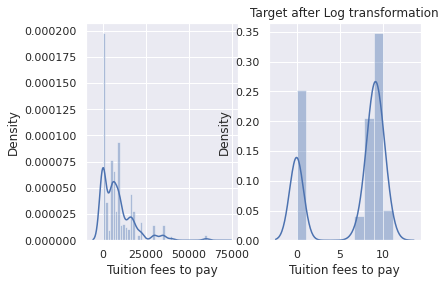

In [14]:
# Let us see what our target looks like visually after a log transformation
sns.set()
y_transformed = pd.Series(np.log1p(y))

fig, ax = plt.subplots(1, 2)
sns.distplot(y, ax=ax[0])
plt.title("Target after Log transformation")
# ax[0].axvline(y_transformed)
sns.distplot(y_transformed, ax=ax[1])
plt.show()

In [25]:
# We are splitting the test and train dataset we will do it for the normal values 
# and the transformed values 
xtrain, xtest, ytrain, ytest = train_test_split(X1, y)
xtrain_t, xtest_t, ytrain_t, ytest_t = train_test_split(X1, y_transformed)

In [26]:
# Let us import RandomForestRegressor to fit our data
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf1 = RandomForestRegressor()
rf.fit(xtrain,ytrain)
rf1.fit(xtrain_t, ytrain_t)

RandomForestRegressor()

In [27]:
# Let us validate our model
val = rf.predict(xtest)
val2 = np.expm1(rf1.predict(xtest_t))
print('Mae Normal -', mean_absolute_error(val, ytest))
print('Mae trans -', mean_absolute_error(val2, np.expm1(ytest_t)))

Mae Normal - 72.08473154362416
Mae trans - 66.29017828097865


APPLYING SCALER TO SEE IF IT IMPROVES ACCURACY AND REDUCES MAE

In [28]:
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X1)
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X2, y)
xtrain_t1, xtest_t1, ytrain_t1, ytest_t1 = train_test_split(X2, y_transformed)

In [29]:
rf2 = RandomForestRegressor()
rf3 = RandomForestRegressor()
rf2.fit(xtrain1, ytrain1)
rf3.fit(xtrain_t1, ytrain_t1)

RandomForestRegressor()

In [30]:
val3 = rf2.predict(xtest1)
val4 = np.expm1(rf3.predict(xtest_t1))
print('Mae Normal -', mean_absolute_error(val3, ytest1))
print('Mae trans -', mean_absolute_error(val4, np.expm1(ytest_t1)))

Mae Normal - 68.49491051454139
Mae trans - 214.35001606646662


USING DUMMIES TO SEE IF IT IMPROVES ACCURACY ALSO

In [31]:
dummy_X = pd.get_dummies(X1, columns = obj_cols)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, y)
xtrain_t2, xtest_t2, ytrain_t2, ytest_t2 = train_test_split(X2, y_transformed)

In [32]:
rf4 = RandomForestRegressor()
rf5 = RandomForestRegressor()
rf4.fit(xtrain2, ytrain2)
rf5.fit(xtrain_t2, ytrain_t2)

RandomForestRegressor()

In [33]:
val5 = rf4.predict(xtest)
val6 = np.expm1(rf5.predict(xtest_t1))
print('Mae Normal -', mean_absolute_error(val5, ytest1))
print('Mae trans -', mean_absolute_error(val6, np.expm1(ytest_t1)))

Mae Normal - 51162.026621923935
Mae trans - 101.28592434169782
